# Stock Technical Analysis: Python Tutorial

Stochastic Oscillator

Contact: andrewshamlet@gmail.com // @andrewshamlet

Python streamlines tasks requiring multiple steps in a single block of code. For this reason, it is a great tool for querying and performing analysis on data.

Last Tutorial, we outlined steps for calculating the Mass Index.

In this Tutorial, we introduce a new technical indicator, the Stochastic Oscillator.

Developed by George C. Lane in the late 1950s, the Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods. 

The Stochastic Oscillator is calculated as follows:
    
       %K = (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100
       %D = 3-day SMA of %K

       Lowest Low = lowest low for the look-back period
       Highest High = highest high for the look-back period
       %K is multiplied by 100 to move the decimal point two places

The default setting for the Stochastic Oscillator is 14 periods, which can be days, weeks, months or an intraday timeframe. A 14-period %K would use the most recent close, the highest high over the last 14 periods and the lowest low over the last 14 periods. %D is a 3-day simple moving average of %K. 

As a bound oscillator, the Stochastic Oscillator makes it easy to identify overbought and oversold levels. The oscillator ranges from zero to one hundred. No matter how fast a security advances or declines, the Stochastic Oscillator will always fluctuate within this range. Traditional settings use 80 as the overbought threshold and 20 as the oversold threshold. These levels can be adjusted to suit analytical needs and security characteristics. Readings above 80 for the 20-day Stochastic Oscillator would indicate that the underlying security was trading near the top of its 20-day high-low range. Readings below 20 occur when a security is trading at the low end of its high-low range.

Before looking at some chart examples, it is important to note that overbought readings are not necessarily bearish. Securities can become overbought and remain overbought during a strong uptrend. Closing levels that are consistently near the top of the range indicate sustained buying pressure. In a similar vein, oversold readings are not necessarily bullish. Securities can also become oversold and remain oversold during a strong downtrend. Closing levels consistently near the bottom of the range indicate sustained selling pressure. It is, therefore, important to identify the bigger trend and trade in the direction of this trend. Look for occasional oversold readings in an uptrend and ignore frequent overbought readings. Similarly, look for occasional overbought readings in a strong downtrend and ignore frequent oversold readings.

Let’s use Python to compute the Stochastic Oscillator.

1.) Import modules.

In [15]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

2.a.) Define function for querying daily close.

In [16]:
def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']

2.b.) Define function for querying daily high.

In [17]:
def get_high(stock,start,end):
     return web.DataReader(stock,'google',start,end)['High']

2.c.) Define function for querying daily low.

In [18]:
def get_low(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Low']

3.) Define function for the Stochastic Oscillator, both %K and %D.

In [19]:
def STOK(close, low, high, n):  
    STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
    return STOK

def STOD(close, low, high, n):
    STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
    STOD = pd.rolling_mean(STOK, 3)
    return STOD

How does the Stochastic Oscillator function work?

3.a.) To calculate %K, we find the difference between the current close and the lowest low for the look-back period, n. We then find the difference between the highest high for the look-back period, n, and the lowest low for the same look-back period. Dividing these two values and multiplying the result by 100, we arrive at %K, which we set to variable STOK.

In [7]:
#STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100

3.b.) Function returns STOK. 

In [8]:
#return STOK

3.c.) To calculate %D, we first calculate %K.

In [9]:
#STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100

3.d.) Then we take the 3 day moving average of %K, and set the value to variable STOD. 

In [12]:
#STOD = pd.rolling_mean(STOK, 3) 

3.e.) Function returns STOD.

In [13]:
#return STOD 

4.) Query daily close, high, and low for ‘FB’ during 2016.

In [20]:
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['High'] = get_high('FB', '1/1/2016', '12/31/2016')
df['Low'] = get_low('FB', '1/1/2016', '12/31/2016')

5.) Run daily close, low, and high through %K and %D functions. Save series to new columns in dataframe. 

In [31]:
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)
df.tail()

,Close,High,Low,%K,%D,%K - %D
Date,,,,,,
2016-12-23,117.27,117.56,116.30,15.645161,34.936464,-19.291303
2016-12-27,118.01,118.68,116.86,27.580645,24.861720,2.718925
2016-12-28,116.92,118.25,116.65,10.000000,17.741935,-7.741935
2016-12-29,116.35,117.53,116.06,4.503106,14.027917,-9.524811
2016-12-30,115.05,116.83,114.77,3.622251,6.041786,-2.419535


6.) Plot daily close, %K, and %D.

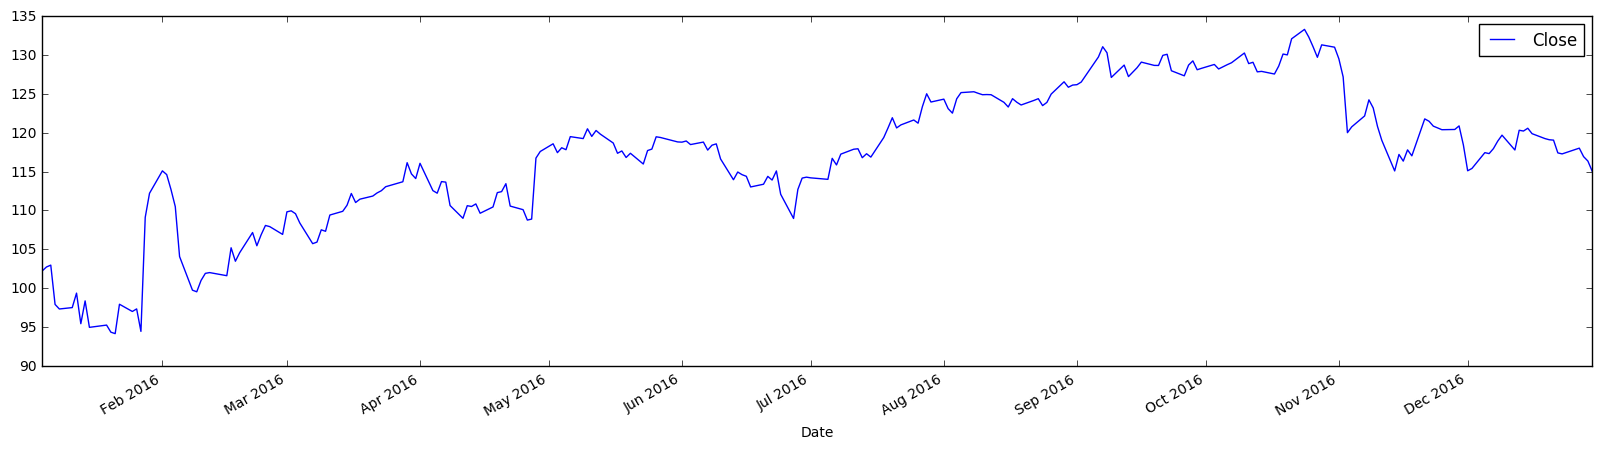

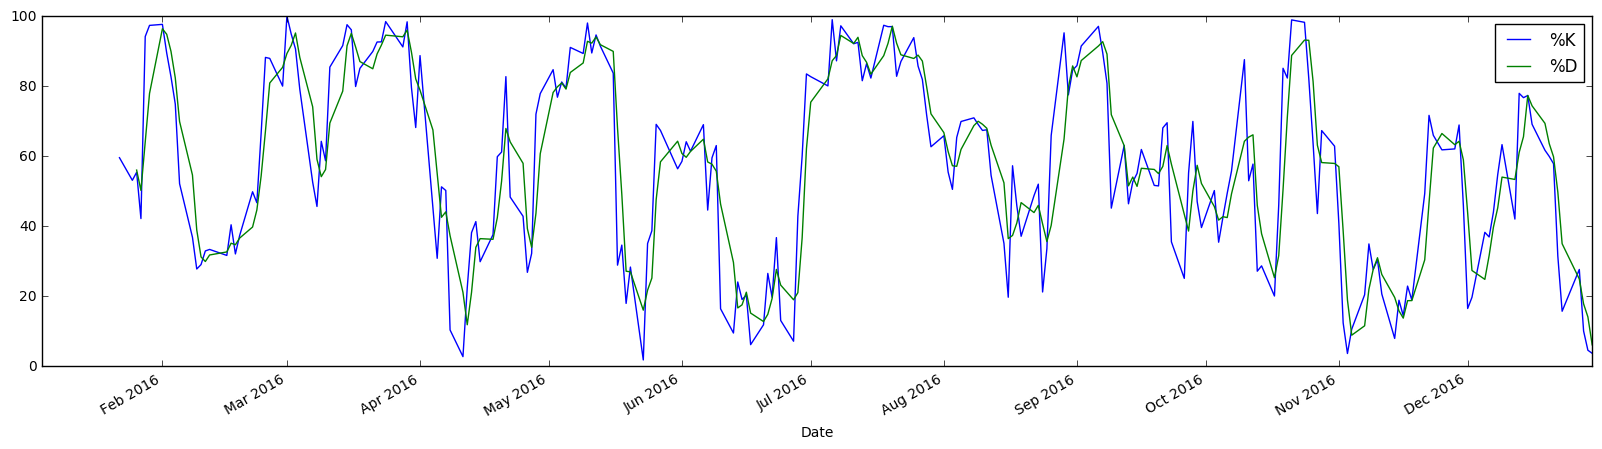

In [32]:
df.plot(y=['Close'], figsize = (20, 5))
df.plot(y=['%K', '%D'], figsize = (20, 5))

There you have it! We created our Stochastic Oscillator indicator. Here’s the full code:

In [33]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']
    
def get_high(stock,start,end):
     return web.DataReader(stock,'google',start,end)['High']
    
def get_low(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Low']
                
def STOK(close, low, high, n):  
    STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
    return STOK

def STOD(close, low, high, n):
    STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
    STOD = pd.rolling_mean(STOK, 3)
    return STOD
   
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['High'] = get_high('FB', '1/1/2016', '12/31/2016')
df['Low'] = get_low('FB', '1/1/2016', '12/31/2016')
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)
df.tail()

,Close,High,Low,%K,%D
Date,,,,,
2016-12-23,117.27,117.56,116.30,15.645161,34.936464
2016-12-27,118.01,118.68,116.86,27.580645,24.861720
2016-12-28,116.92,118.25,116.65,10.000000,17.741935
2016-12-29,116.35,117.53,116.06,4.503106,14.027917
2016-12-30,115.05,116.83,114.77,3.622251,6.041786
